In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.fftpack
import scipy.stats
from matplotlib.dates import DateFormatter, date2num

In [3]:
file_path = r'D:\Stations_data\Stations_data\Bansathi\Bansathi_all_months_copy'
os.chdir(file_path)

In [4]:
df1 = pd.read_csv('Bansathi_all.csv', sep = ',') #arse_dates = 'date')

df1['date'] = pd.to_datetime(df1.date, format = '%d.%m.%Y %H:%M:%S')
df1.set_index('date', inplace = True)
df1_1hr = df1.resample('60min').mean()
df1_1day = df1.resample('1440min').mean()

In [5]:
df2 = pd.read_csv('Rainfall_data_new.csv', sep = ',')
df2['Date & Time'] = pd.to_datetime(df2['Date & Time'])#, format = "%d/%m/%Y - %H:%M:%S")
df2 = df2.set_index('Date & Time')
df2_1hr = df2.resample('60min').mean()
df2_1hr = df2_1hr.fillna(0.0)
df2_1hr.shape

(7998, 3)

In [6]:
df3 = pd.read_csv('Temp_Rain_Bansathi.csv', sep = ',')
df3['Date & Time'] = pd.to_datetime(df3['Date & Time'], format = "%d/%m/%Y - %H:%M:%S")
df3 = df3.set_index('Date & Time')
df3_1hr = df3.resample('60min').mean()
# df3_1hr.head()

In [7]:
# date_mask = (df1_1hr.index >= '2020-09-25') & (df1_1hr.index < '2020-10-15')

In [8]:
# # Pre-Monsoon
# date_mask1 = (df1_1hr.index >= '2020-04-11') & (df1_1hr.index < '2020-04-17')
# date_mask2 = (df2_1hr.index >= '2020-04-11') & (df2_1hr.index < '2020-04-17')
# date_mask3 = (df3_1hr.index >= '2020-04-11') & (df3_1hr.index < '2020-04-17')

# # Monsoon
# date_mask1 = (df1_1hr.index >= '2020-06-17') & (df1_1hr.index < '2020-06-24')
# date_mask2 = (df2_1hr.index >= '2020-06-17') & (df2_1hr.index < '2020-06-24')
# date_mask3 = (df3_1hr.index >= '2020-06-17') & (df3_1hr.index < '2020-06-24')

# Post-Monsoon
date_mask1 = (df1_1hr.index >= '2020-09-25') & (df1_1hr.index < '2020-10-01')
date_mask2 = (df2_1hr.index >= '2020-09-25') & (df2_1hr.index < '2020-10-01')
date_mask3 = (df3_1hr.index >= '2020-09-25') & (df3_1hr.index < '2020-10-01')

# # Winter
# date_mask1 = (df1_1hr.index >= '2020-12-24') & (df1_1hr.index < '2020-12-30')
# date_mask2 = (df2_1hr.index >= '2020-12-24') & (df2_1hr.index < '2020-12-30')
# date_mask3 = (df3_1hr.index >= '2020-12-24') & (df3_1hr.index < '2020-12-30')

In [9]:
dfs = [df1_1hr, df2_1hr, df3_1hr]

# Extracting the desired slice of Time-Series (Soil-Moisture)
SM_sensor1 = df1_1hr['S1SM'].loc[date_mask1]
SM_sensor2 = df1_1hr['S2SM'].loc[date_mask1]
SM_sensor3 = df1_1hr['S3SM'].loc[date_mask1]
SM_sensor4 = df1_1hr['S4SM'].loc[date_mask1]
SM_sensor5 = df1_1hr['S5SM'].loc[date_mask1]
SM_sensor6 = df1_1hr['S6SM'].loc[date_mask1]
SM_sensor7 = df1_1hr['S7SM'].loc[date_mask1]
SM_sensor8 = df1_1hr['S8SM'].loc[date_mask1]
SM_sensor9 = df1_1hr['S9SM'].loc[date_mask1]
SM_sensor10 = df1_1hr['S10SM'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Soil-Temperature)
ST_sensor1 = df1_1hr['S1Temp'].loc[date_mask1]
ST_sensor2 = df1_1hr['S2Temp'].loc[date_mask1]
ST_sensor3 = df1_1hr['S3Temp'].loc[date_mask1]
ST_sensor4 = df1_1hr['S4Temp'].loc[date_mask1]
ST_sensor5 = df1_1hr['S5Temp'].loc[date_mask1]
ST_sensor6 = df1_1hr['S6Temp'].loc[date_mask1]
ST_sensor7 = df1_1hr['S7Temp'].loc[date_mask1]
ST_sensor8 = df1_1hr['S8Temp'].loc[date_mask1]
ST_sensor9 = df1_1hr['S9Temp'].loc[date_mask1]
ST_sensor10 = df1_1hr['S10Temp'].loc[date_mask1]

# Extracting the desired slice of Time-Series (Rain-Fall)
Rainfall = df2_1hr['Int_Rainfall (mm)'].loc[date_mask2]

# Extracting the desired slice of Time-Series (Air-Temperature)
Air_Temp = df3_1hr['Temp (0C)'].loc[date_mask3]

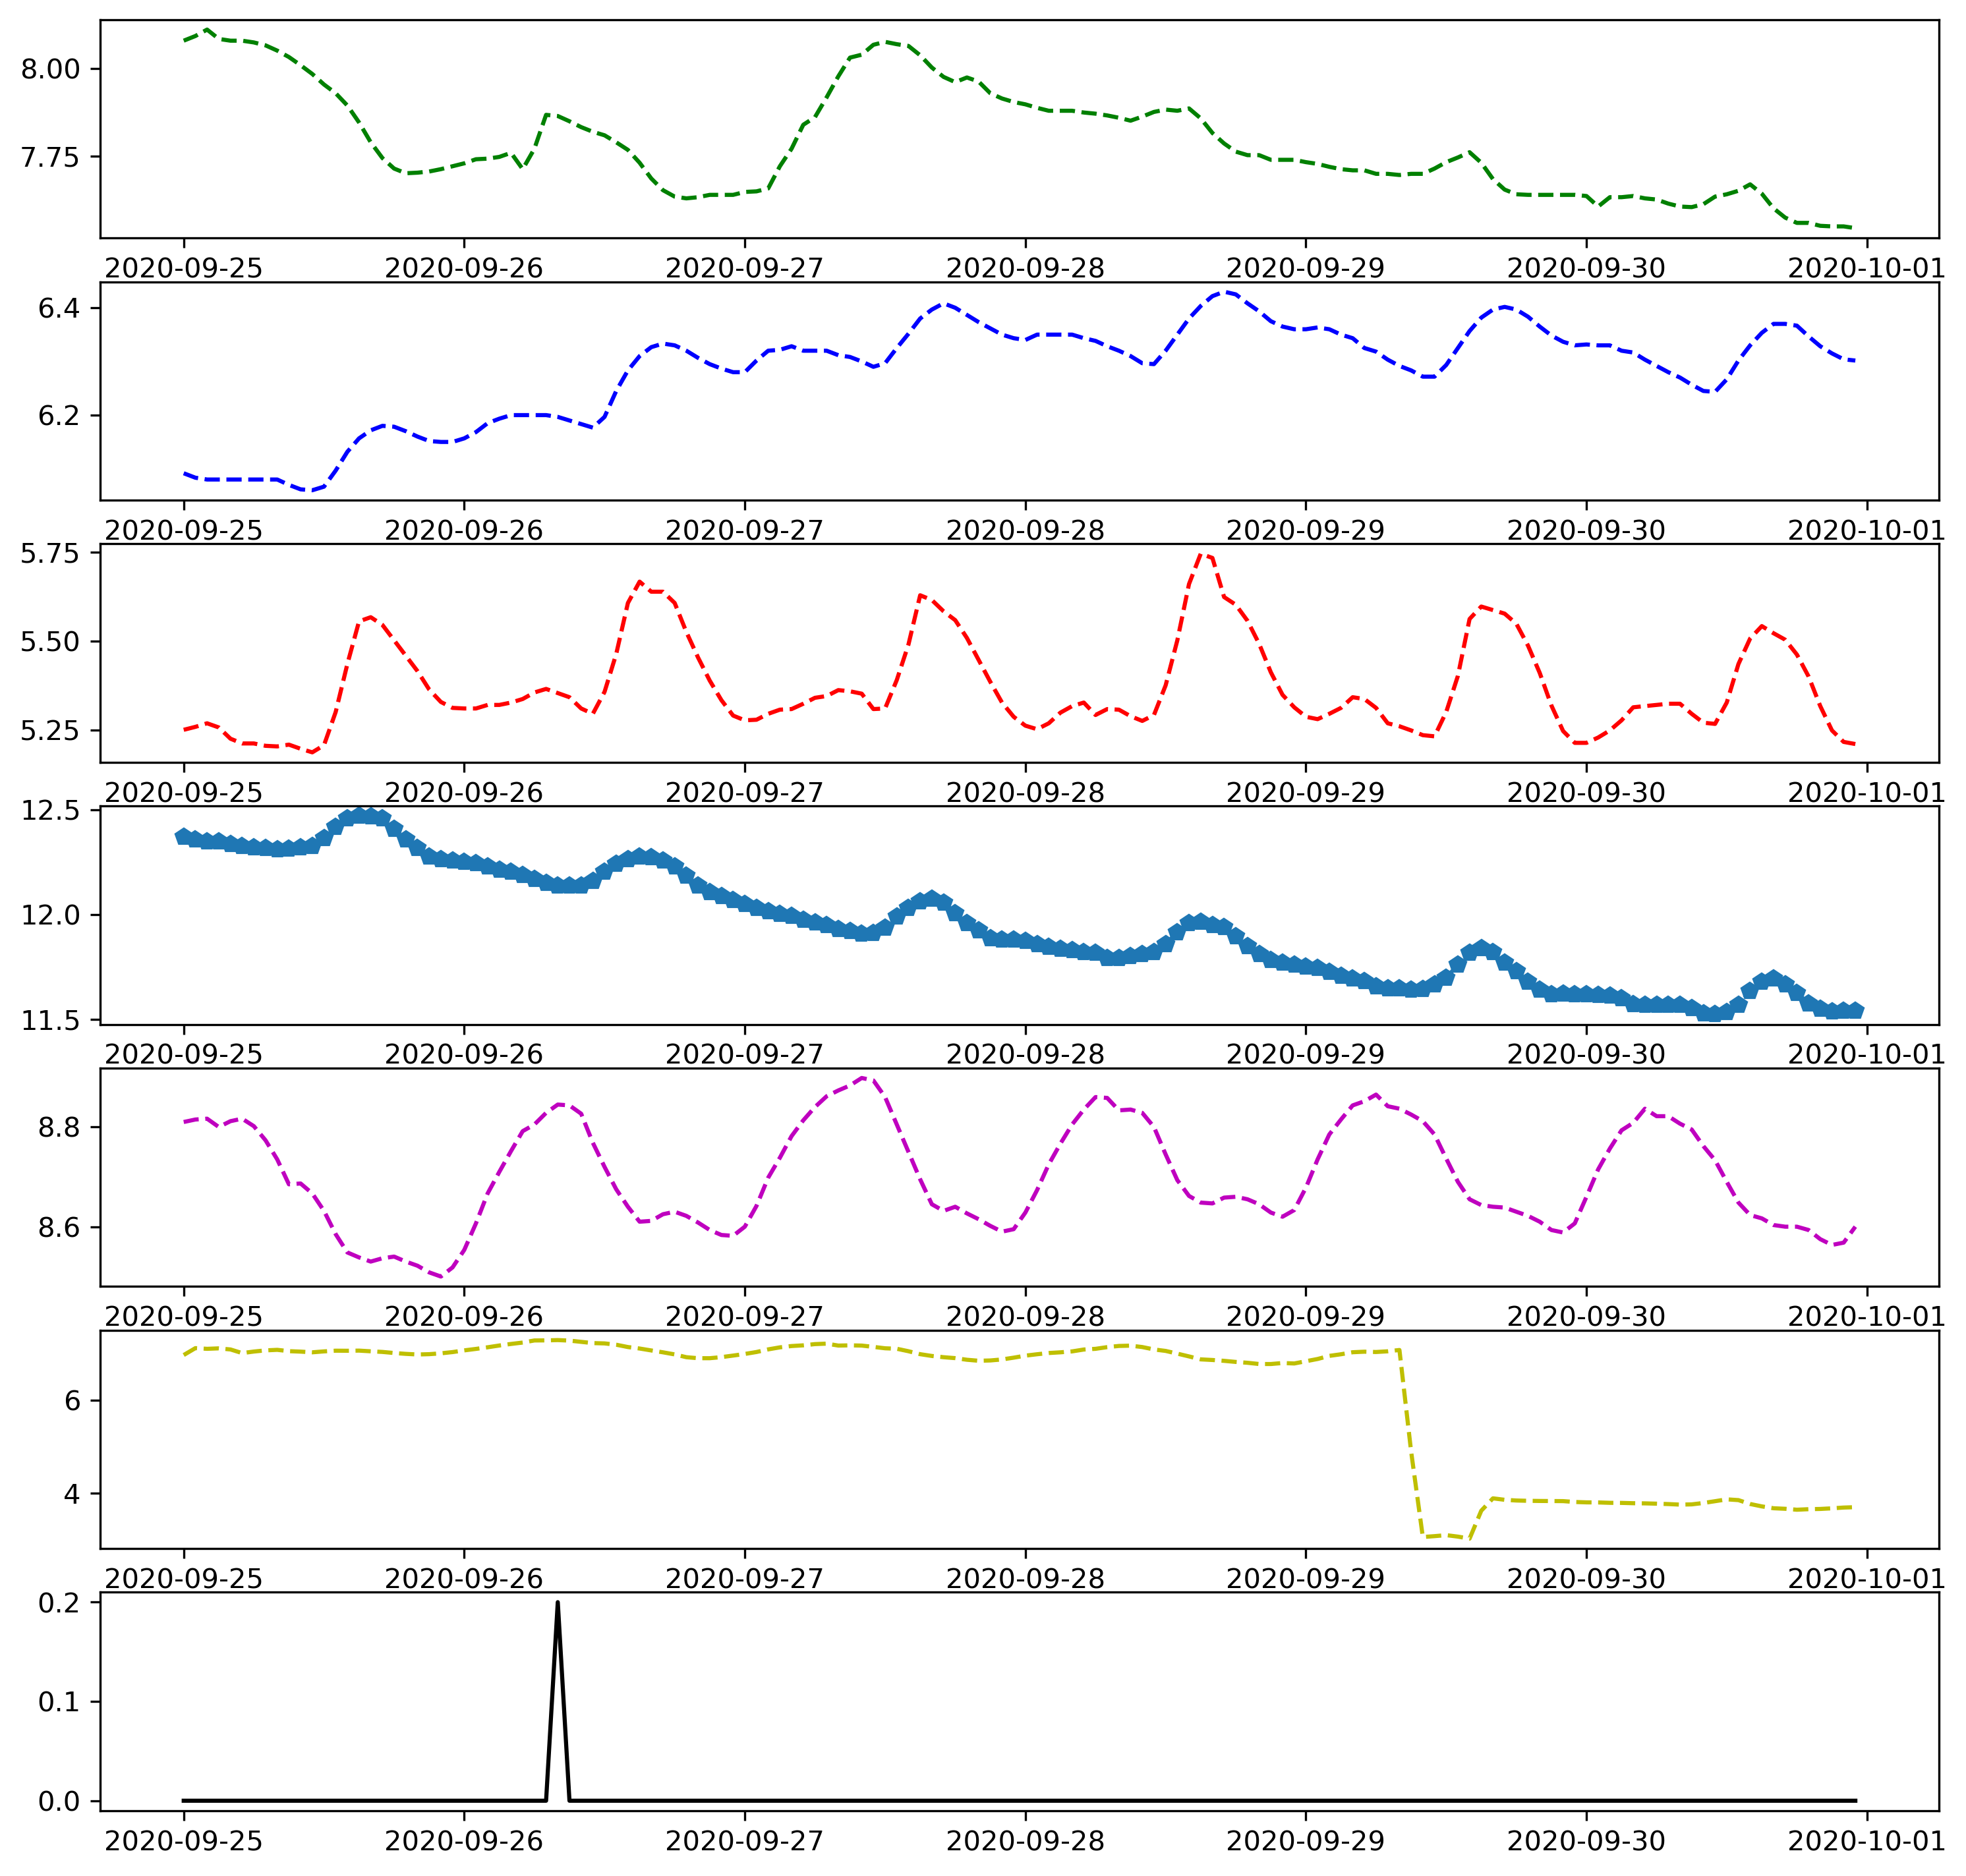

In [10]:
fig, ax = plt.subplots(7, 1, figsize = (12, 12), dpi = 300)
ax[0].plot(SM_sensor1, 'g--', label = 'Sensor-1')
ax[1].plot(SM_sensor5, 'b--', label = 'Sensor-5')
ax[2].plot(SM_sensor6, 'r--', label = 'Sensor-6')
ax[3].plot(SM_sensor7, 'p--', label = 'Sensor-7')
ax[4].plot(SM_sensor8, 'm--', label = 'Sensor-8')
ax[5].plot(SM_sensor9, 'y--', label = 'Sensor-9')
ax[6].plot(Rainfall, 'k', label = 'Rainfall');
# ax[0,1,2,3,4,5,6].legend();

In [11]:
# SM_sensor1 = SM_sensor1.interpolate(method='linear')
# SM_sensor2 = SM_sensor2.values.fillna(method='ffill')
# SM_sensor3 = SM_sensor3.values.fillna(method='ffill')
# SM_sensor4 = SM_sensor4.values.fillna(method='ffill')
# SM_sensor5 = SM_sensor5.values.fillna(method='ffill')

In [12]:
SM_sensor1 = SM_sensor1.interpolate(method= 'quadratic')
SM_sensor2 = SM_sensor2.interpolate(method= 'quadratic')
SM_sensor3 = SM_sensor3.interpolate(method= 'quadratic')
SM_sensor4 = SM_sensor4.interpolate(method= 'quadratic')
SM_sensor5 = SM_sensor5.interpolate(method= 'quadratic')
SM_sensor6 = SM_sensor6.interpolate(method= 'quadratic')
SM_sensor7 = SM_sensor7.interpolate(method= 'quadratic')
SM_sensor8 = SM_sensor8.interpolate(method= 'quadratic')
SM_sensor9 = SM_sensor9.interpolate(method= 'quadratic')
SM_sensor10 = SM_sensor10.interpolate(method= 'quadratic')

ST_sensor1 = ST_sensor1.interpolate(method= 'quadratic')
ST_sensor2 = ST_sensor2.interpolate(method= 'quadratic')
ST_sensor3 = ST_sensor3.interpolate(method= 'quadratic')
ST_sensor4 = ST_sensor4.interpolate(method= 'quadratic')
ST_sensor5 = ST_sensor5.interpolate(method= 'quadratic')
ST_sensor6 = ST_sensor6.interpolate(method= 'quadratic')
ST_sensor7 = ST_sensor7.interpolate(method= 'quadratic')
ST_sensor8 = ST_sensor8.interpolate(method= 'quadratic')
ST_sensor9 = ST_sensor9.interpolate(method= 'quadratic')
ST_sensor10 = ST_sensor10.interpolate(method= 'quadratic')

In [13]:
# picking the maximum soil moisture, soil temperature and air temperature values per day

max_S1SM_hour= SM_sensor1.groupby(pd.Grouper(freq='D')).idxmax()
max_S2SM_hour= SM_sensor2.groupby(pd.Grouper(freq='D')).idxmax()
max_S3SM_hour= SM_sensor3.groupby(pd.Grouper(freq='D')).idxmax()
max_S4SM_hour= SM_sensor4.groupby(pd.Grouper(freq='D')).idxmax()
max_S5SM_hour= SM_sensor5.groupby(pd.Grouper(freq='D')).idxmax()
max_S6SM_hour= SM_sensor6.groupby(pd.Grouper(freq='D')).idxmax()
max_S7SM_hour= SM_sensor7.groupby(pd.Grouper(freq='D')).idxmax()
max_S8SM_hour= SM_sensor8.groupby(pd.Grouper(freq='D')).idxmax()
max_S9SM_hour= SM_sensor9.groupby(pd.Grouper(freq='D')).idxmax()
max_S10SM_hour= SM_sensor10.groupby(pd.Grouper(freq='D')).idxmax()

max_S1ST_hour= ST_sensor1.groupby(pd.Grouper(freq='D')).idxmax()
max_S2ST_hour= ST_sensor2.groupby(pd.Grouper(freq='D')).idxmax()
max_S3ST_hour= ST_sensor3.groupby(pd.Grouper(freq='D')).idxmax()
max_S4ST_hour= ST_sensor4.groupby(pd.Grouper(freq='D')).idxmax()
max_S5ST_hour= ST_sensor5.groupby(pd.Grouper(freq='D')).idxmax()
max_S6ST_hour= ST_sensor6.groupby(pd.Grouper(freq='D')).idxmax()
max_S7ST_hour= ST_sensor7.groupby(pd.Grouper(freq='D')).idxmax()
max_S8ST_hour= ST_sensor8.groupby(pd.Grouper(freq='D')).idxmax()
max_S9ST_hour= ST_sensor9.groupby(pd.Grouper(freq='D')).idxmax()
max_S10ST_hour= ST_sensor10.groupby(pd.Grouper(freq='D')).idxmax()
max_AirT_hour= Air_Temp.groupby(pd.Grouper(freq='D')).idxmax()

In [14]:
## Soil Temperature and air temperature lag

# Temperature lags
T_S1_lag = max_S1ST_hour - max_AirT_hour
T_S5_lag = max_S5ST_hour - max_AirT_hour
T_S6_lag = max_S6ST_hour - max_AirT_hour
T_S7_lag = max_S7ST_hour - max_AirT_hour
T_S8_lag = max_S8ST_hour - max_AirT_hour
T_S9_lag = max_S9ST_hour - max_AirT_hour

#Temperature and moisture lags
SMT_S1_lag = max_S1ST_hour - max_S1SM_hour
SMT_S5_lag = max_S5ST_hour - max_S5SM_hour
SMT_S6_lag = max_S6ST_hour - max_S6SM_hour
SMT_S7_lag = max_S7ST_hour - max_S7SM_hour
SMT_S8_lag = max_S8ST_hour - max_S8SM_hour
SMT_S9_lag = max_S9ST_hour - max_S9SM_hour

In [15]:
print('Soil Temperature: Sensor1')
print(max_S1ST_hour)
print('\n')
print('Soil Temperature: Sensor5')
print(max_S5ST_hour)
print('\n')
print('Soil Temperature: Sensor6')
print(max_S6ST_hour)
print('\n')
print('Soil Temperature: Sensor7')
print(max_S7ST_hour)
print('\n')
print('Soil Temperature: Sensor8')
print(max_S8ST_hour)
print('\n')
print('Soil Temperature: Sensor9')
print(max_S9ST_hour)
print('\n')
print('Air Temperature')
print(max_AirT_hour)

Soil Temperature: Sensor1
date
2020-09-25   2020-09-25 15:00:00
2020-09-26   2020-09-26 15:00:00
2020-09-27   2020-09-27 15:00:00
2020-09-28   2020-09-28 15:00:00
2020-09-29   2020-09-29 15:00:00
2020-09-30   2020-09-30 15:00:00
Freq: D, Name: S1Temp, dtype: datetime64[ns]


Soil Temperature: Sensor5
date
2020-09-25   2020-09-25 18:00:00
2020-09-26   2020-09-26 17:00:00
2020-09-27   2020-09-27 17:00:00
2020-09-28   2020-09-28 17:00:00
2020-09-29   2020-09-29 17:00:00
2020-09-30   2020-09-30 17:00:00
Freq: D, Name: S5Temp, dtype: datetime64[ns]


Soil Temperature: Sensor6
date
2020-09-25   2020-09-25 16:00:00
2020-09-26   2020-09-26 16:00:00
2020-09-27   2020-09-27 16:00:00
2020-09-28   2020-09-28 16:00:00
2020-09-29   2020-09-29 15:00:00
2020-09-30   2020-09-30 15:00:00
Freq: D, Name: S6Temp, dtype: datetime64[ns]


Soil Temperature: Sensor7
date
2020-09-25   2020-09-25 17:00:00
2020-09-26   2020-09-26 17:00:00
2020-09-27   2020-09-27 17:00:00
2020-09-28   2020-09-28 17:00:00
2020-09-2

In [16]:
print("#####Soil - Air Temperature lag#####")
# print('Sensor1 Lag:', '\n', T_S1_lag.describe())
# print('Sensor5 Lag:', '\n', T_S5_lag.describe())
# print('Sensor6 Lag:', '\n', T_S6_lag.describe())
# print('Sensor7 Lag:', '\n', T_S7_lag.describe())
# print('Sensor8 Lag:', '\n', T_S8_lag.describe())
# print('Sensor9 Lag:', '\n', T_S9_lag.describe())

#####Soil - Air Temperature lag#####


In [17]:
print('Sensor1 Max Soil Moisture:', '\n', max_S1SM_hour)
print('Sensor5 Max Soil Moisture:', '\n', max_S5SM_hour)
print('Sensor6 Max Soil Moisture:', '\n', max_S6SM_hour)
print('Sensor7 Max Soil Moisture:', '\n', max_S7SM_hour)
print('Sensor8 Max Soil Moisture:', '\n', max_S8SM_hour)
print('Sensor9 Max Soil Moisture:', '\n', max_S9SM_hour)

Sensor1 Max Soil Moisture: 
 date
2020-09-25   2020-09-25 02:00:00
2020-09-26   2020-09-26 07:00:00
2020-09-27   2020-09-27 12:00:00
2020-09-28   2020-09-28 00:00:00
2020-09-29   2020-09-29 14:00:00
2020-09-30   2020-09-30 14:00:00
Freq: D, Name: S1SM, dtype: datetime64[ns]
Sensor5 Max Soil Moisture: 
 date
2020-09-25   2020-09-25 17:00:00
2020-09-26   2020-09-26 17:00:00
2020-09-27   2020-09-27 17:00:00
2020-09-28   2020-09-28 17:00:00
2020-09-29   2020-09-29 17:00:00
2020-09-30   2020-09-30 16:00:00
Freq: D, Name: S5SM, dtype: datetime64[ns]
Sensor6 Max Soil Moisture: 
 date
2020-09-25   2020-09-25 16:00:00
2020-09-26   2020-09-26 15:00:00
2020-09-27   2020-09-27 15:00:00
2020-09-28   2020-09-28 15:00:00
2020-09-29   2020-09-29 15:00:00
2020-09-30   2020-09-30 15:00:00
Freq: D, Name: S6SM, dtype: datetime64[ns]
Sensor7 Max Soil Moisture: 
 date
2020-09-25   2020-09-25 15:00:00
2020-09-26   2020-09-26 15:00:00
2020-09-27   2020-09-27 16:00:00
2020-09-28   2020-09-28 15:00:00
2020-09-2

In [18]:
timelag_df = pd.concat([T_S1_lag, T_S5_lag, SMT_S1_lag, SMT_S5_lag], axis = 1)
# x = pd.to_timedelta(T_S1_lag)
# y = pd.to_datetime(x)
# plt.plot(y, 'r')
# plt.ytick_label[1, 2, 3, 4, 5];
timelag_df.rename(columns = {"0": 'S1_Temp_Lag', "1": 'S5_Temp_Lag', "3":'S1_SMT_Lag',
                             "4":'S5_SMT_Lag'}, inplace = True)
timelag_df

0               1               2               3
date                                                                      
2020-09-25 0 days 01:00:00 0 days 04:00:00 0 days 13:00:00 0 days 01:00:00
2020-09-26 0 days 00:00:00 0 days 02:00:00 0 days 08:00:00 0 days 00:00:00
2020-09-27 0 days 01:00:00 0 days 03:00:00 0 days 03:00:00 0 days 00:00:00
2020-09-28 0 days 02:00:00 0 days 04:00:00 0 days 15:00:00 0 days 00:00:00
2020-09-29 0 days 02:00:00 0 days 04:00:00 0 days 01:00:00 0 days 00:00:00
2020-09-30 0 days 04:00:00 0 days 06:00:00 0 days 01:00:00 0 days 01:00:00

In [19]:
# fg, ax = plt.subplots(3, 2, figsize=(22, 14), dpi=600)
# fg.autofmt_xdate(rotation=35)
# ax0 = ax[0,0].twinx()
# ax0.bar(T_S1_lag.index, (T_S1_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# ax0.set_ylabel('Time-lag (Hrs)')
# ax[0,0].plot(ST_sensor1, 'r.-', label = 'Soil Temperature')
# # ax[0,0].set_xlabel('Time (Date)')
# ax[0,0].grid()
# ax[0,0].set_title('Sensor - 1')
# ax[0,0].plot(Air_Temp, 'm.-', label = 'Air Temperature')
# ax[0,0].set_ylabel('Temperature [$^\circ$C]')
# # axx[1].set_xlabel('Time (Date)')
# # axx[1].grid()
# # ax[0,0].set_xticklabels(xlabels, rotation = 35)
# # myFmt = DateFormatter("%H:%M:%S")
# # ax0.yaxis.set_major_formatter(myFmt)
# ax[0,0].vlines(max_S1ST_hour, ST_sensor1.min(), ST_sensor1.max(), color = 'red', label = 'Soil Temperature Maximum',
#           linestyles = 'dashdot')
# ax[0,0].vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
#            linestyles = 'dotted')
# ax0.legend(loc = 2)
# ax[0,0].legend(loc = 1)

# ax1 = ax[0,1].twinx()
# ax[0,1].plot(ST_sensor5, 'r.-')
# ax[0,1].plot(Air_Temp, 'm.-')
# ax[0,1].vlines(max_S5ST_hour, ST_sensor5.min(), ST_sensor5.max(), color = 'red', label = 'Soil Temperature Maximum',
#           linestyles = 'dashdot')
# ax[0,1].vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
#            linestyles = 'dotted')
# ax1.bar(T_S5_lag.index, (T_S5_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# ax1.set_ylabel('Time-lag (Hrs)')
# # ax[0,1].set_xlabel('Time (Date)')
# ax[0,1].grid()
# ax[0,1].set_title('Sensor - 5')
# ax[0,1].plot(Air_Temp, 'm.-', label = 'Air Temperature')
# ax[0,1].set_ylabel('Temperature [$^\circ$C]')

# ax2 = ax[1,0].twinx()
# ax[1,0].plot(ST_sensor6, 'r.-')
# ax[1,0].plot(Air_Temp, 'm.-')
# ax[1,0].vlines(max_S6ST_hour, ST_sensor6.min(), ST_sensor6.max(), color = 'red', label = 'Soil Temperature Maximum',
#           linestyles = 'dashdot')
# ax[1,0].vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
#            linestyles = 'dotted')
# ax2.bar(T_S6_lag.index, (T_S6_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# ax2.set_ylabel('Time-lag (Hrs)')
# # ax[1,0].set_xlabel('Time (Date)')
# ax[1,0].grid()
# ax[1,0].set_title('Sensor - 6')
# ax[1,0].plot(Air_Temp, 'm.-', label = 'Air Temperature')
# ax[1,0].set_ylabel('Temperature [$^\circ$C]')

# ax3 = ax[1,1].twinx()
# ax[1,1].plot(ST_sensor7, 'r.-')
# ax[1,1].plot(Air_Temp, 'm.-')
# ax[1,1].vlines(max_S7ST_hour, ST_sensor7.min(), ST_sensor7.max(), color = 'red', label = 'Soil Temperature Maximum',
#           linestyles = 'dashdot')
# ax[1,1].vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
#            linestyles = 'dotted')
# ax3.bar(T_S7_lag.index, (T_S7_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# ax3.set_ylabel('Time-lag (Hrs)')
# # ax[1,1].set_xlabel('Time (Date)')
# ax[1,1].grid()
# ax[1,1].set_title('Sensor - 7')
# ax[1,1].plot(Air_Temp, 'm.-', label = 'Air Temperature')
# ax[1,1].set_ylabel('Temperature [$^\circ$C]')

# ax4 = ax[2,0].twinx()
# ax[2,0].plot(ST_sensor8, 'r.-')
# ax[2,0].plot(Air_Temp, 'm.-')
# ax[2,0].vlines(max_S8ST_hour, ST_sensor8.min(), ST_sensor8.max(), color = 'red', label = 'Soil Temperature Maximum',
#           linestyles = 'dashdot')
# ax[2,0].vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
#            linestyles = 'dotted')
# ax4.bar(T_S8_lag.index, (T_S8_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# ax4.set_ylabel('Time-lag (Hrs)')
# ax[2,0].set_xlabel('Time (Date)')
# ax[2,0].grid()
# ax[2,0].set_title('Sensor - 8')
# ax[2,0].plot(Air_Temp, 'm.-', label = 'Air Temperature')
# ax[2,0].set_ylabel('Temperature [$^\circ$C]')

# ax5 = ax[2,1].twinx()
# ax[2,1].plot(ST_sensor9, 'r.-')
# ax[2,1].plot(Air_Temp, 'm.-')
# ax[2,1].vlines(max_S9ST_hour, ST_sensor9.min(), ST_sensor9.max(), color = 'red', label = 'Soil Temperature Maximum',
#           linestyles = 'dashdot')
# ax[2,1].vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
#            linestyles = 'dotted')
# ax5.bar(T_S9_lag.index, (T_S9_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# ax5.set_ylabel('Time-lag (Hrs)')
# ax[2,1].set_xlabel('Time (Date)')
# ax[2,1].grid()
# ax[2,1].set_title('Sensor - 9')
# ax[2,1].plot(Air_Temp, 'm.-', label = 'Air Temperature')
# ax[2,1].set_ylabel('Temperature [$^\circ$C]')

# plt.tight_layout()
# # plt.savefig('Bansathi_S1_SM_2020-10.png', dpi=300)
# plt.show()

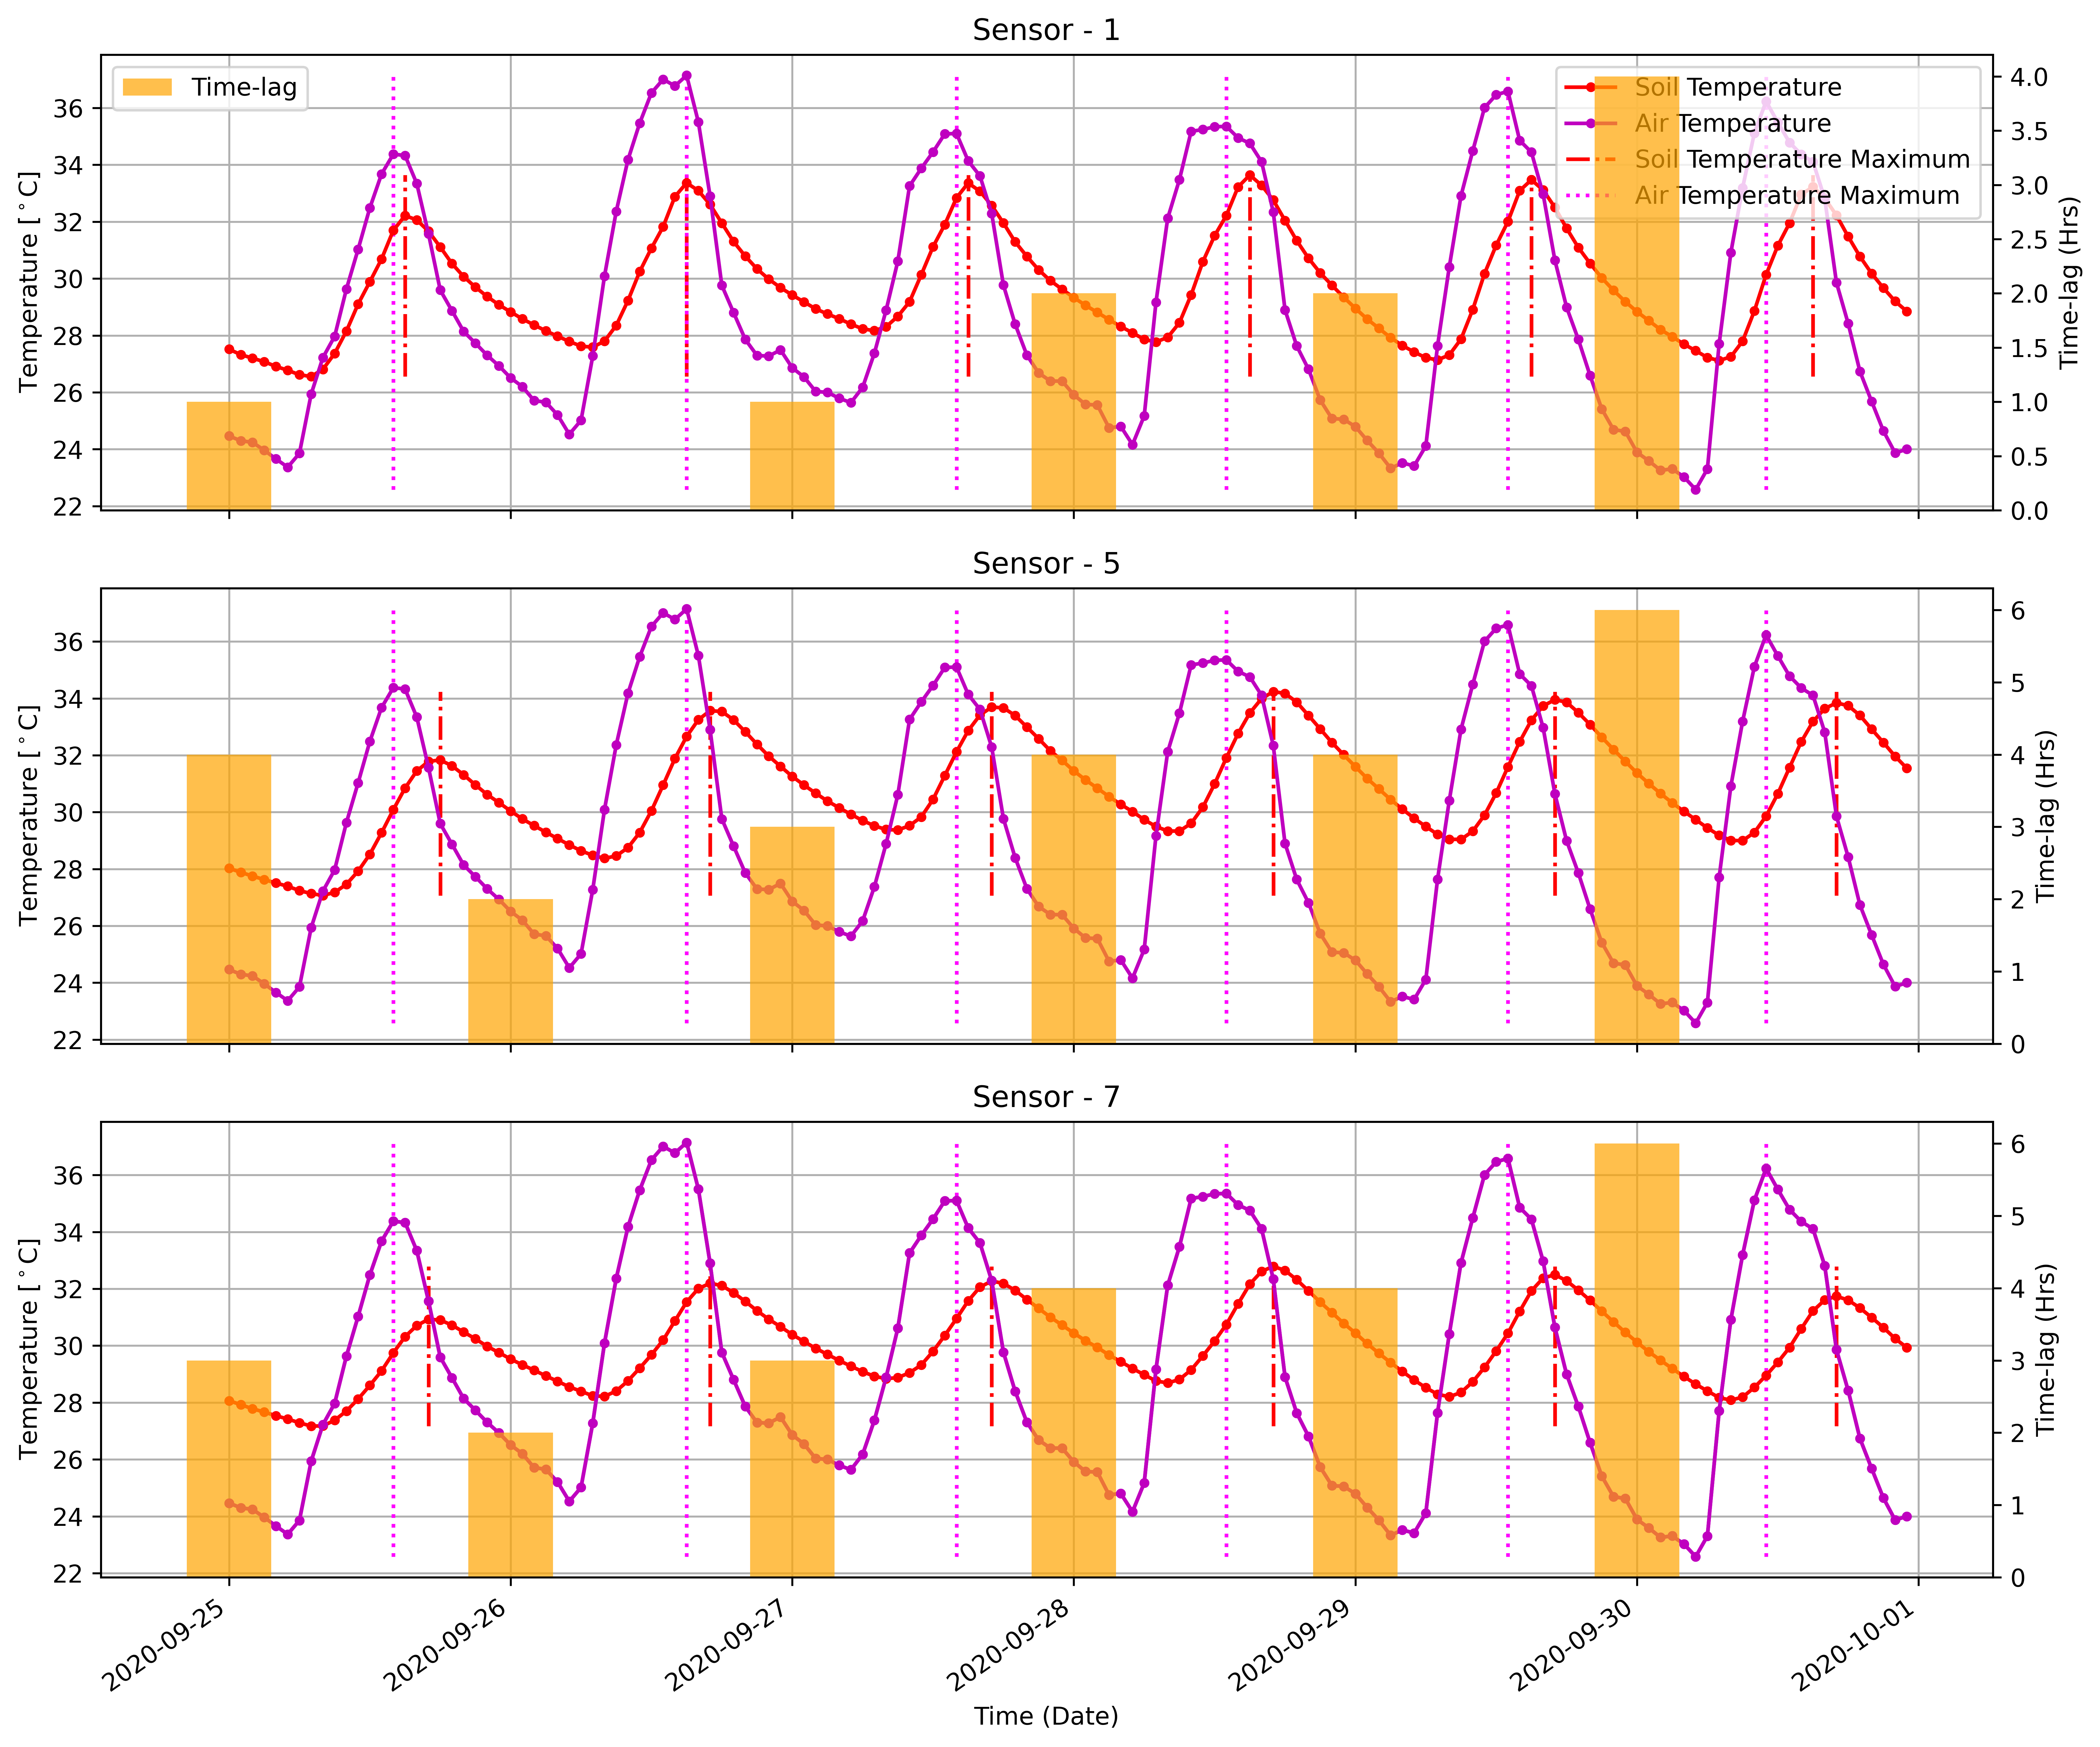

In [20]:
fg, axx = plt.subplots(3, 1, figsize=(12, 10), dpi=600)
fg.autofmt_xdate(rotation=35)
axx0 = axx[0].twinx()
axx0.bar(T_S1_lag.index, (T_S1_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
        alpha = 0.7, label = 'Time-lag')
axx0.set_ylabel('Time-lag (Hrs)')
axx[0].plot(ST_sensor1, 'r.-', label = 'Soil Temperature')
# ax[0,0].set_xlabel('Time (Date)')
axx[0].grid()
axx[0].set_title('Sensor - 1')
axx[0].plot(Air_Temp, 'm.-', label = 'Air Temperature')
axx[0].set_ylabel('Temperature [$^\circ$C]')
# axx[1].grid()
# ax[0,0].set_xticklabels(xlabels, rotation = 35)
# myFmt = DateFormatter("%H:%M:%S")
# ax0.yaxis.set_major_formatter(myFmt)
axx[0].vlines(max_S1ST_hour, ST_sensor1.min(), ST_sensor1.max(), color = 'red', label = 'Soil Temperature Maximum',
          linestyles = 'dashdot')
axx[0].vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
           linestyles = 'dotted')
axx0.legend(loc = 2)
axx[0].legend(loc = 1)

axx1 = axx[1].twinx()
axx[1].plot(ST_sensor5, 'r.-')
axx[1].plot(Air_Temp, 'm.-')
axx[1].vlines(max_S5ST_hour, ST_sensor5.min(), ST_sensor5.max(), color = 'red', label = 'Soil Temperature Maximum',
          linestyles = 'dashdot')
axx[1].vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
           linestyles = 'dotted')
axx1.bar(T_S5_lag.index, (T_S5_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
        alpha = 0.7, label = 'Time-lag')
axx1.set_ylabel('Time-lag (Hrs)')
# ax[0,1].set_xlabel('Time (Date)')
axx[1].grid()
axx[1].set_title('Sensor - 5')
axx[1].set_ylabel('Temperature [$^\circ$C]')

axx2 = axx[2].twinx()
axx[2].plot(ST_sensor7, 'r.-')
axx[2].plot(Air_Temp, 'm.-')
axx[2].vlines(max_S7ST_hour, ST_sensor7.min(), ST_sensor7.max(), color = 'red', label = 'Soil Temperature Maximum',
          linestyles = 'dashdot')
axx[2].vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
           linestyles = 'dotted')
axx2.bar(T_S7_lag.index, (T_S7_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
        alpha = 0.7, label = 'Time-lag')
axx2.set_ylabel('Time-lag (Hrs)')
axx[2].set_xlabel('Time (Date)')
axx[2].grid()
axx[2].set_title('Sensor - 7')
axx[2].plot(Air_Temp, 'm.-', label = 'Air Temperature')
axx[2].set_ylabel('Temperature [$^\circ$C]')

plt.tight_layout()
plt.show()

In [21]:
# fg, axxx = plt.subplots(2, 1, figsize=(10, 8), dpi=600)
# fg.autofmt_xdate(rotation=35)
# axxx0 = axxx[0].twinx()
# axxx0.bar(T_S1_lag.index, (T_S1_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# axxx0.set_ylabel('Time-lag (Hrs)')
# axxx[0].plot(ST_sensor1, 'r.-', label = 'Soil Temperature')
# # ax[0,0].set_xlabel('Time (Date)')
# axxx[0].grid()
# axxx[0].set_title('Sensor - 1')
# axxx[0].plot(Air_Temp, 'm.-', label = 'Air Temperature')
# axxx[0].set_ylabel('Temperature [$^\circ$C]')
# # axx[1].grid()
# # ax[0,0].set_xticklabels(xlabels, rotation = 35)
# # myFmt = DateFormatter("%H:%M:%S")
# # ax0.yaxis.set_major_formatter(myFmt)
# axxx[0].vlines(max_S1ST_hour, ST_sensor1.min(), ST_sensor1.max(), color = 'red', label = 'Soil Temperature Maximum',
#           linestyles = 'dashdot')
# axxx[0].vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
#            linestyles = 'dotted')
# axxx0.legend(loc = 2)
# axxx[0].legend(loc = 1)

# axxx1 = axxx[1].twinx()
# axxx[1].plot(ST_sensor5, 'r.-')
# axxx[1].plot(Air_Temp, 'm.-')
# axxx[1].vlines(max_S5ST_hour, ST_sensor5.min(), ST_sensor5.max(), color = 'red', label = 'Soil Temperature Maximum',
#           linestyles = 'dashdot')
# axxx[1].vlines(max_AirT_hour, Air_Temp.min(), Air_Temp.max(), color = 'magenta', label = 'Air Temperature Maximum',
#            linestyles = 'dotted')
# axxx1.bar(T_S5_lag.index, (T_S5_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# axxx1.set_ylabel('Time-lag (Hrs)')
# axxx[1].set_xlabel('Time (Date)')
# axxx[1].grid()
# axxx[1].set_title('Sensor - 5')
# axxx[1].set_ylabel('Temperature [$^\circ$C]')

# plt.tight_layout()
# plt.show()

### Soil Moisture and Soil Temperature Lags

In [22]:

print("#####Soil Moisture - Temperature lag#####")
print('Sensor1 Lag:', '\n', SMT_S1_lag)
print('Sensor5 Lag:', '\n', SMT_S5_lag)
print('Sensor6 Lag:', '\n', SMT_S6_lag)
print('Sensor7 Lag:', '\n', SMT_S7_lag)
print('Sensor8 Lag:', '\n', SMT_S8_lag)
print('Sensor9 Lag:', '\n', SMT_S9_lag)
print('Dates', '\n', SMT_S1_lag.index)

#####Soil Moisture - Temperature lag#####
Sensor1 Lag: 
 date
2020-09-25   0 days 13:00:00
2020-09-26   0 days 08:00:00
2020-09-27   0 days 03:00:00
2020-09-28   0 days 15:00:00
2020-09-29   0 days 01:00:00
2020-09-30   0 days 01:00:00
Freq: D, dtype: timedelta64[ns]
Sensor5 Lag: 
 date
2020-09-25   0 days 01:00:00
2020-09-26   0 days 00:00:00
2020-09-27   0 days 00:00:00
2020-09-28   0 days 00:00:00
2020-09-29   0 days 00:00:00
2020-09-30   0 days 01:00:00
Freq: D, dtype: timedelta64[ns]
Sensor6 Lag: 
 date
2020-09-25   0 days 00:00:00
2020-09-26   0 days 01:00:00
2020-09-27   0 days 01:00:00
2020-09-28   0 days 01:00:00
2020-09-29   0 days 00:00:00
2020-09-30   0 days 00:00:00
Freq: D, dtype: timedelta64[ns]
Sensor7 Lag: 
 date
2020-09-25   0 days 02:00:00
2020-09-26   0 days 02:00:00
2020-09-27   0 days 01:00:00
2020-09-28   0 days 02:00:00
2020-09-29   0 days 02:00:00
2020-09-30   0 days 01:00:00
Freq: D, dtype: timedelta64[ns]
Sensor8 Lag: 
 date
2020-09-25   0 days 16:00:00
2020-

In [23]:
# fg, ax1 = plt.subplots(3, 2, figsize=(22, 14), dpi=600)
# fg.autofmt_xdate(rotation=35)
# ax00 = ax1[0,0].twinx()
# ax10 = ax1[0,0].twinx()
# fg.subplots_adjust(right=40)
# ax10.spines["right"].set_position(("outward",40))
# ax10.set_ylabel('Time-lag (Hrs)')
# ax1[0,0].set_ylabel('Vol. Soil Moisture ($m^3/m^3$)')
# ax1[0,0].plot(SM_sensor1, 'b.-', label = 'Soil Moistue')
# ax1[0,0].grid()
# ax1[0,0].set_title('Sensor - 1')
# ax00.plot(ST_sensor1, 'r.-', label = 'Soil Temperature')
# ax00.set_ylabel('Temperature [$^\circ$C]')
# # axx[1].set_xlabel('Time (Date)')
# # axx[1].grid()
# # ax[0,0].set_xticklabels(xlabels, rotation = 35)
# # myFmt = DateFormatter("%H:%M:%S")
# # ax0.yaxis.set_major_formatter(myFmt)
# ax1[0,0].vlines(max_S1SM_hour, SM_sensor1.min(), SM_sensor1.max(), color = 'blue', label = 'Soil Moisture Maximum',
#           linestyles = 'dashdot')
# ax00.vlines(max_S1ST_hour, ST_sensor1.min(), ST_sensor1.max(), color = 'red', label = 'Soil Temperature Maximum',
#            linestyles = 'dotted')
# ax10.bar(SMT_S1_lag.index, (SMT_S1_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# ax00.legend(loc = 2)
# ax1[0,0].legend(loc = 1)

# ax01 = ax1[0,1].twinx()
# ax11 = ax1[0,1].twinx()
# ax11.spines["right"].set_position(("outward",55))
# ax1[0,1].plot(SM_sensor5, 'b.-')
# ax01.plot(ST_sensor5, 'r.-')
# ax1[0,1].vlines(max_S5SM_hour, SM_sensor5.min(), SM_sensor5.max(), color = 'blue', label = 'Soil Moisture Maximum',
#           linestyles = 'dashdot')
# ax01.vlines(max_S5ST_hour, ST_sensor5.min(), ST_sensor5.max(), color = 'red', label = 'Soil Temperature Maximum',
#            linestyles = 'dotted')
# ax11.bar(SMT_S5_lag.index, (SMT_S5_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# ax11.set_ylabel('Time-lag (Hrs)')
# # ax1[0,1].set_xlabel('Time (Date)')
# ax1[0,1].grid()
# ax1[0,1].set_title('Sensor - 5')
# ax01.set_ylabel('Temperature [$^\circ$C]')

# ax02 = ax1[1,0].twinx()
# ax12 = ax1[1,0].twinx()
# ax12.spines["right"].set_position(("outward",55))
# ax1[1,0].plot(SM_sensor6, 'b.-')
# ax02.plot(ST_sensor6, 'r.-')
# ax1[1,0].vlines(max_S6SM_hour, SM_sensor6.min(), SM_sensor6.max(), color = 'blue', label = 'Soil Moisture Maximum',
#           linestyles = 'dashdot')
# ax02.vlines(max_S6ST_hour, ST_sensor6.min(), ST_sensor6.max(), color = 'red', label = 'Soil Temperature Maximum',
#            linestyles = 'dotted')
# ax12.bar(SMT_S6_lag.index, (SMT_S6_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# ax12.set_ylabel('Time-lag (Hrs)')
# # ax1[0,1].set_xlabel('Time (Date)')
# ax1[1,0].grid()
# ax1[1,0].set_title('Sensor - 6')
# ax02.set_ylabel('Temperature [$^\circ$C]')

# ax03 = ax1[1,1].twinx()
# ax13 = ax1[1,1].twinx()
# ax13.spines["right"].set_position(("outward",55))
# ax1[1,1].plot(SM_sensor7, 'b.-')
# ax03.plot(ST_sensor7, 'r.-')
# ax1[1,1].vlines(max_S7SM_hour, SM_sensor7.min(), SM_sensor7.max(), color = 'blue', label = 'Soil Moisture Maximum',
#           linestyles = 'dashdot')
# ax03.vlines(max_S7ST_hour, ST_sensor7.min(), ST_sensor7.max(), color = 'red', label = 'Soil Temperature Maximum',
#            linestyles = 'dotted')
# ax13.bar(SMT_S7_lag.index, (SMT_S7_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# ax13.set_ylabel('Time-lag (Hrs)')
# # ax1[0,1].set_xlabel('Time (Date)')
# ax1[1,1].grid()
# ax1[1,1].set_title('Sensor - 7')
# ax03.set_ylabel('Temperature [$^\circ$C]')

# ax04 = ax1[2,0].twinx()
# ax14 = ax1[2,0].twinx()
# ax14.spines["right"].set_position(("outward",55))
# ax1[2,0].plot(SM_sensor8, 'b.-')
# ax04.plot(ST_sensor8, 'r.-')
# ax1[2,0].vlines(max_S8SM_hour, SM_sensor8.min(), SM_sensor8.max(), color = 'blue', label = 'Soil Moisture Maximum',
#           linestyles = 'dashdot')
# ax04.vlines(max_S8ST_hour, ST_sensor8.min(), ST_sensor8.max(), color = 'red', label = 'Soil Temperature Maximum',
#            linestyles = 'dotted')
# ax14.bar(SMT_S8_lag.index, (SMT_S8_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# ax14.set_ylabel('Time-lag (Hrs)')
# ax1[2,0].set_xlabel('Time (Date)')
# ax1[2,0].grid()
# ax1[2,0].set_title('Sensor - 8')
# ax04.set_ylabel('Temperature [$^\circ$C]')

# ax05 = ax1[2,1].twinx()
# ax15 = ax1[2,1].twinx()
# ax15.spines["right"].set_position(("outward",55))
# ax1[2,1].plot(SM_sensor9, 'b.-')
# ax05.plot(ST_sensor9, 'r.-')
# ax1[2,1].vlines(max_S9SM_hour, SM_sensor9.min(), SM_sensor9.max(), color = 'blue', label = 'Soil Moisture Maximum',
#           linestyles = 'dashdot')
# ax05.vlines(max_S9ST_hour, ST_sensor9.min(), ST_sensor9.max(), color = 'red', label = 'Soil Temperature Maximum',
#            linestyles = 'dotted')
# ax15.bar(SMT_S9_lag.index, (SMT_S9_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# ax15.set_ylabel('Time-lag (Hrs)')
# ax1[2,1].set_xlabel('Time (Date)')
# ax1[2,1].grid()
# ax1[2,1].set_title('Sensor - 9')
# ax05.set_ylabel('Temperature [$^\circ$C]')

# plt.tight_layout()
# plt.show()

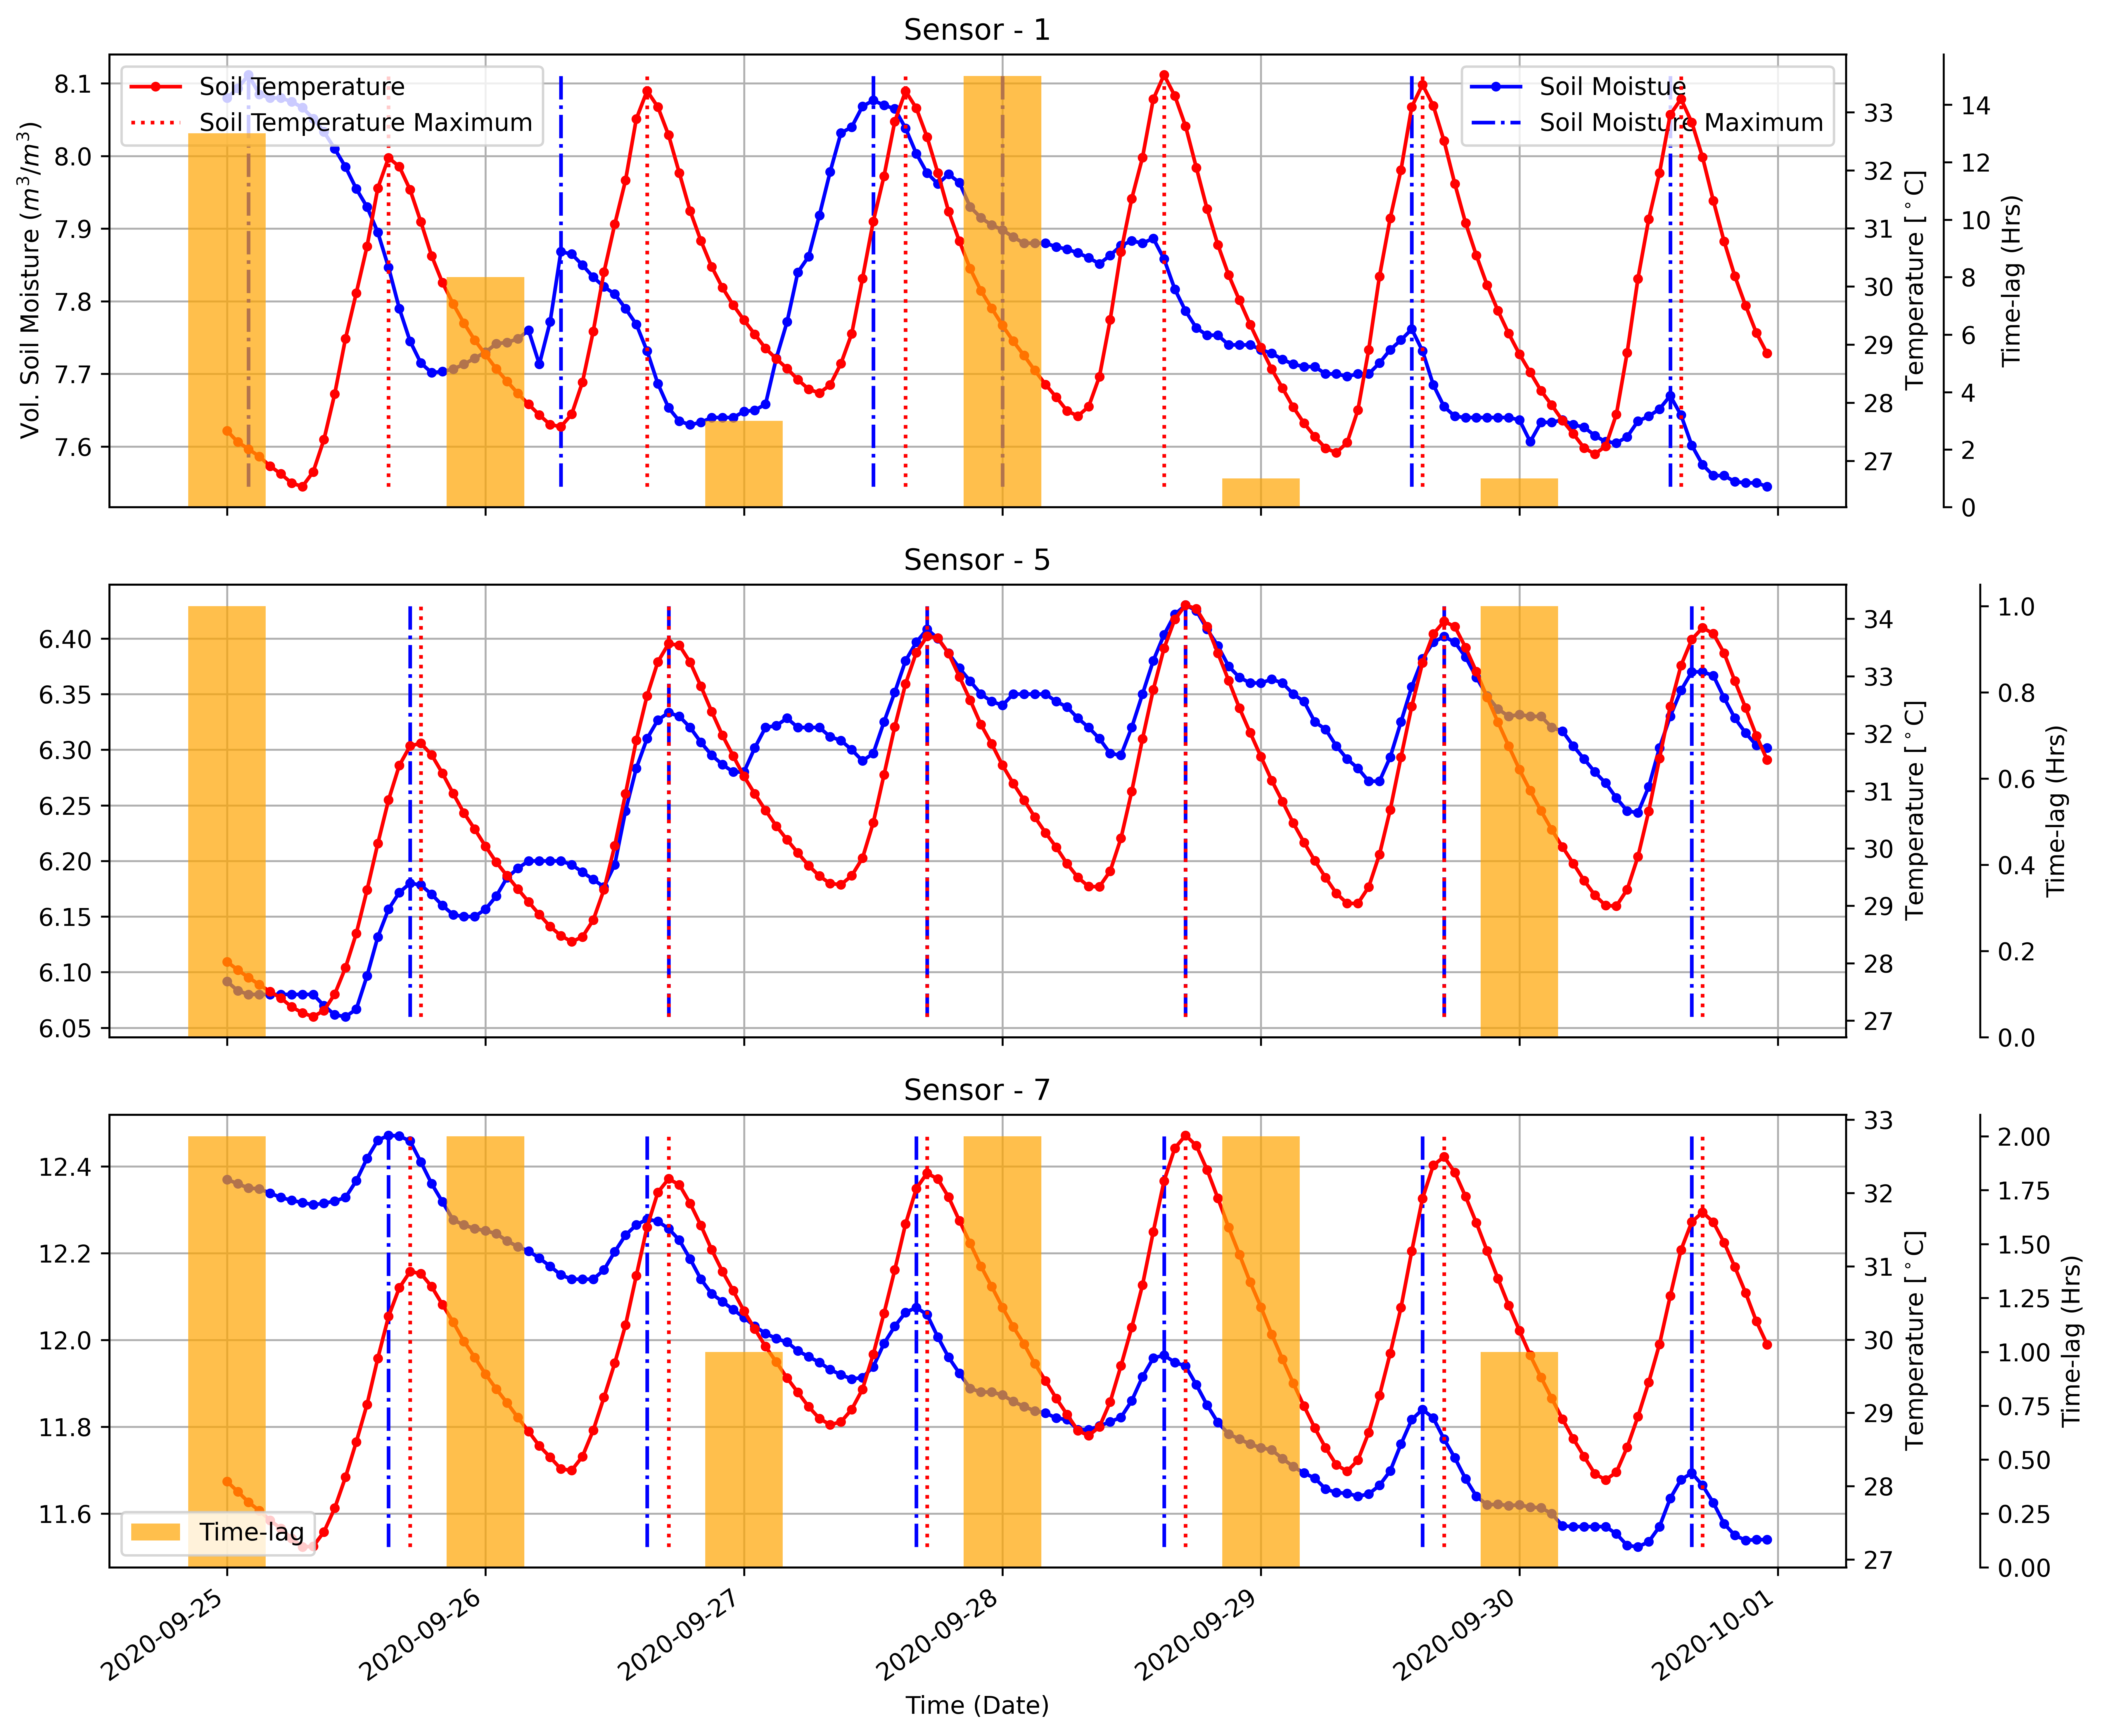

In [24]:
fg, ax2 = plt.subplots(3, 1, figsize=(12, 10), dpi=600)
fg.autofmt_xdate(rotation=35)
ax00 = ax2[0].twinx()
ax10 = ax2[0].twinx()
fg.subplots_adjust(right=40)
ax10.spines["right"].set_position(("outward",40))
ax10.set_ylabel('Time-lag (Hrs)')
ax2[0].set_ylabel('Vol. Soil Moisture ($m^3/m^3$)')
ax2[0].plot(SM_sensor1, 'b.-', label = 'Soil Moistue')
ax2[0].grid()
ax2[0].set_title('Sensor - 1')
ax00.plot(ST_sensor1, 'r.-', label = 'Soil Temperature')
ax00.set_ylabel('Temperature [$^\circ$C]')
# axx[1].set_xlabel('Time (Date)')
# axx[1].grid()
# ax[0,0].set_xticklabels(xlabels, rotation = 35)
# myFmt = DateFormatter("%H:%M:%S")
# ax0.yaxis.set_major_formatter(myFmt)
ax2[0].vlines(max_S1SM_hour, SM_sensor1.min(), SM_sensor1.max(), color = 'blue', label = 'Soil Moisture Maximum',
          linestyles = 'dashdot')
ax00.vlines(max_S1ST_hour, ST_sensor1.min(), ST_sensor1.max(), color = 'red', label = 'Soil Temperature Maximum',
           linestyles = 'dotted')
ax10.bar(SMT_S1_lag.index, (SMT_S1_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
        alpha = 0.7, label = 'Time-lag')
ax00.legend(loc = 2)
ax2[0].legend(loc = 1)

ax01 = ax2[1].twinx()
ax11 = ax2[1].twinx()
ax11.spines["right"].set_position(("outward",55))
ax2[1].plot(SM_sensor5, 'b.-')
ax01.plot(ST_sensor5, 'r.-')
ax2[1].vlines(max_S5SM_hour, SM_sensor5.min(), SM_sensor5.max(), color = 'blue', label = 'Soil Moisture Maximum',
          linestyles = 'dashdot')
ax01.vlines(max_S5ST_hour, ST_sensor5.min(), ST_sensor5.max(), color = 'red', label = 'Soil Temperature Maximum',
           linestyles = 'dotted')
ax11.bar(SMT_S5_lag.index, (SMT_S5_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
        alpha = 0.7, label = 'Time-lag')
ax11.set_ylabel('Time-lag (Hrs)')
# ax1[0,1].set_xlabel('Time (Date)')
ax2[1].grid()
ax2[1].set_title('Sensor - 5')
ax01.set_ylabel('Temperature [$^\circ$C]')

ax02 = ax2[2].twinx()
ax12 = ax2[2].twinx()
ax12.spines["right"].set_position(("outward",55))
ax2[2].plot(SM_sensor7, 'b.-')
ax02.plot(ST_sensor7, 'r.-')
ax2[2].vlines(max_S7SM_hour, SM_sensor7.min(), SM_sensor7.max(), color = 'blue', label = 'Soil Moisture Maximum',
          linestyles = 'dashdot')
ax02.vlines(max_S7ST_hour, ST_sensor7.min(), ST_sensor7.max(), color = 'red', label = 'Soil Temperature Maximum',
           linestyles = 'dotted')
ax12.bar(SMT_S7_lag.index, (SMT_S7_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
        alpha = 0.7, label = 'Time-lag')
ax12.set_ylabel('Time-lag (Hrs)')
ax12.legend(loc = 3)
ax2[2].set_xlabel('Time (Date)')
ax2[2].grid()
ax2[2].set_title('Sensor - 7')
ax02.set_ylabel('Temperature [$^\circ$C]')

plt.tight_layout()
plt.show()

In [25]:
# fg, axx2 = plt.subplots(2, 1, figsize=(10, 8), dpi=600)
# fg.autofmt_xdate(rotation=35)
# axx00 = axx2[0].twinx()
# axx10 = axx2[0].twinx()
# fg.subplots_adjust(right=40)
# axx10.spines["right"].set_position(("outward",40))
# axx10.set_ylabel('Time-lag (Hrs)')
# axx2[0].set_ylabel('Vol. Soil Moisture ($m^3/m^3$)')
# axx2[0].plot(SM_sensor1, 'b.-', label = 'Soil Moistue')
# axx2[0].grid()
# axx2[0].set_title('Sensor - 1')
# axx00.plot(ST_sensor1, 'r.-', label = 'Soil Temperature')
# axx00.set_ylabel('Temperature [$^\circ$C]')
# # axx[1].set_xlabel('Time (Date)')
# # axx[1].grid()
# # ax[0,0].set_xticklabels(xlabels, rotation = 35)
# # myFmt = DateFormatter("%H:%M:%S")
# # ax0.yaxis.set_major_formatter(myFmt)
# axx2[0].vlines(max_S1SM_hour, SM_sensor1.min(), SM_sensor1.max(), color = 'blue', label = 'Soil Moisture Maximum',
#           linestyles = 'dashdot')
# axx00.vlines(max_S1ST_hour, ST_sensor1.min(), ST_sensor1.max(), color = 'red', label = 'Soil Temperature Maximum',
#            linestyles = 'dotted')
# axx10.bar(SMT_S1_lag.index, (SMT_S1_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# axx00.legend(loc = 2)
# axx2[0].legend(loc = 1)

# axx01 = axx2[1].twinx()
# axx11 = axx2[1].twinx()
# axx11.spines["right"].set_position(("outward",55))
# axx2[1].plot(SM_sensor5, 'b.-')
# axx01.plot(ST_sensor5, 'r.-')
# axx2[1].vlines(max_S5SM_hour, SM_sensor5.min(), SM_sensor5.max(), color = 'blue', label = 'Soil Moisture Maximum',
#           linestyles = 'dashdot')
# axx01.vlines(max_S5ST_hour, ST_sensor5.min(), ST_sensor5.max(), color = 'red', label = 'Soil Temperature Maximum',
#            linestyles = 'dotted')
# axx11.bar(SMT_S5_lag.index, (SMT_S5_lag.values/np.timedelta64(3600, 's')), color = 'orange', width = 0.3,
#         alpha = 0.7, label = 'Time-lag')
# axx11.set_ylabel('Time-lag (Hrs)')
# axx2[1].set_xlabel('Time (Date)')
# axx2[1].grid()
# axx2[1].set_title('Sensor - 5')
# axx01.set_ylabel('Temperature [$^\circ$C]')

# plt.tight_layout()
# plt.show()

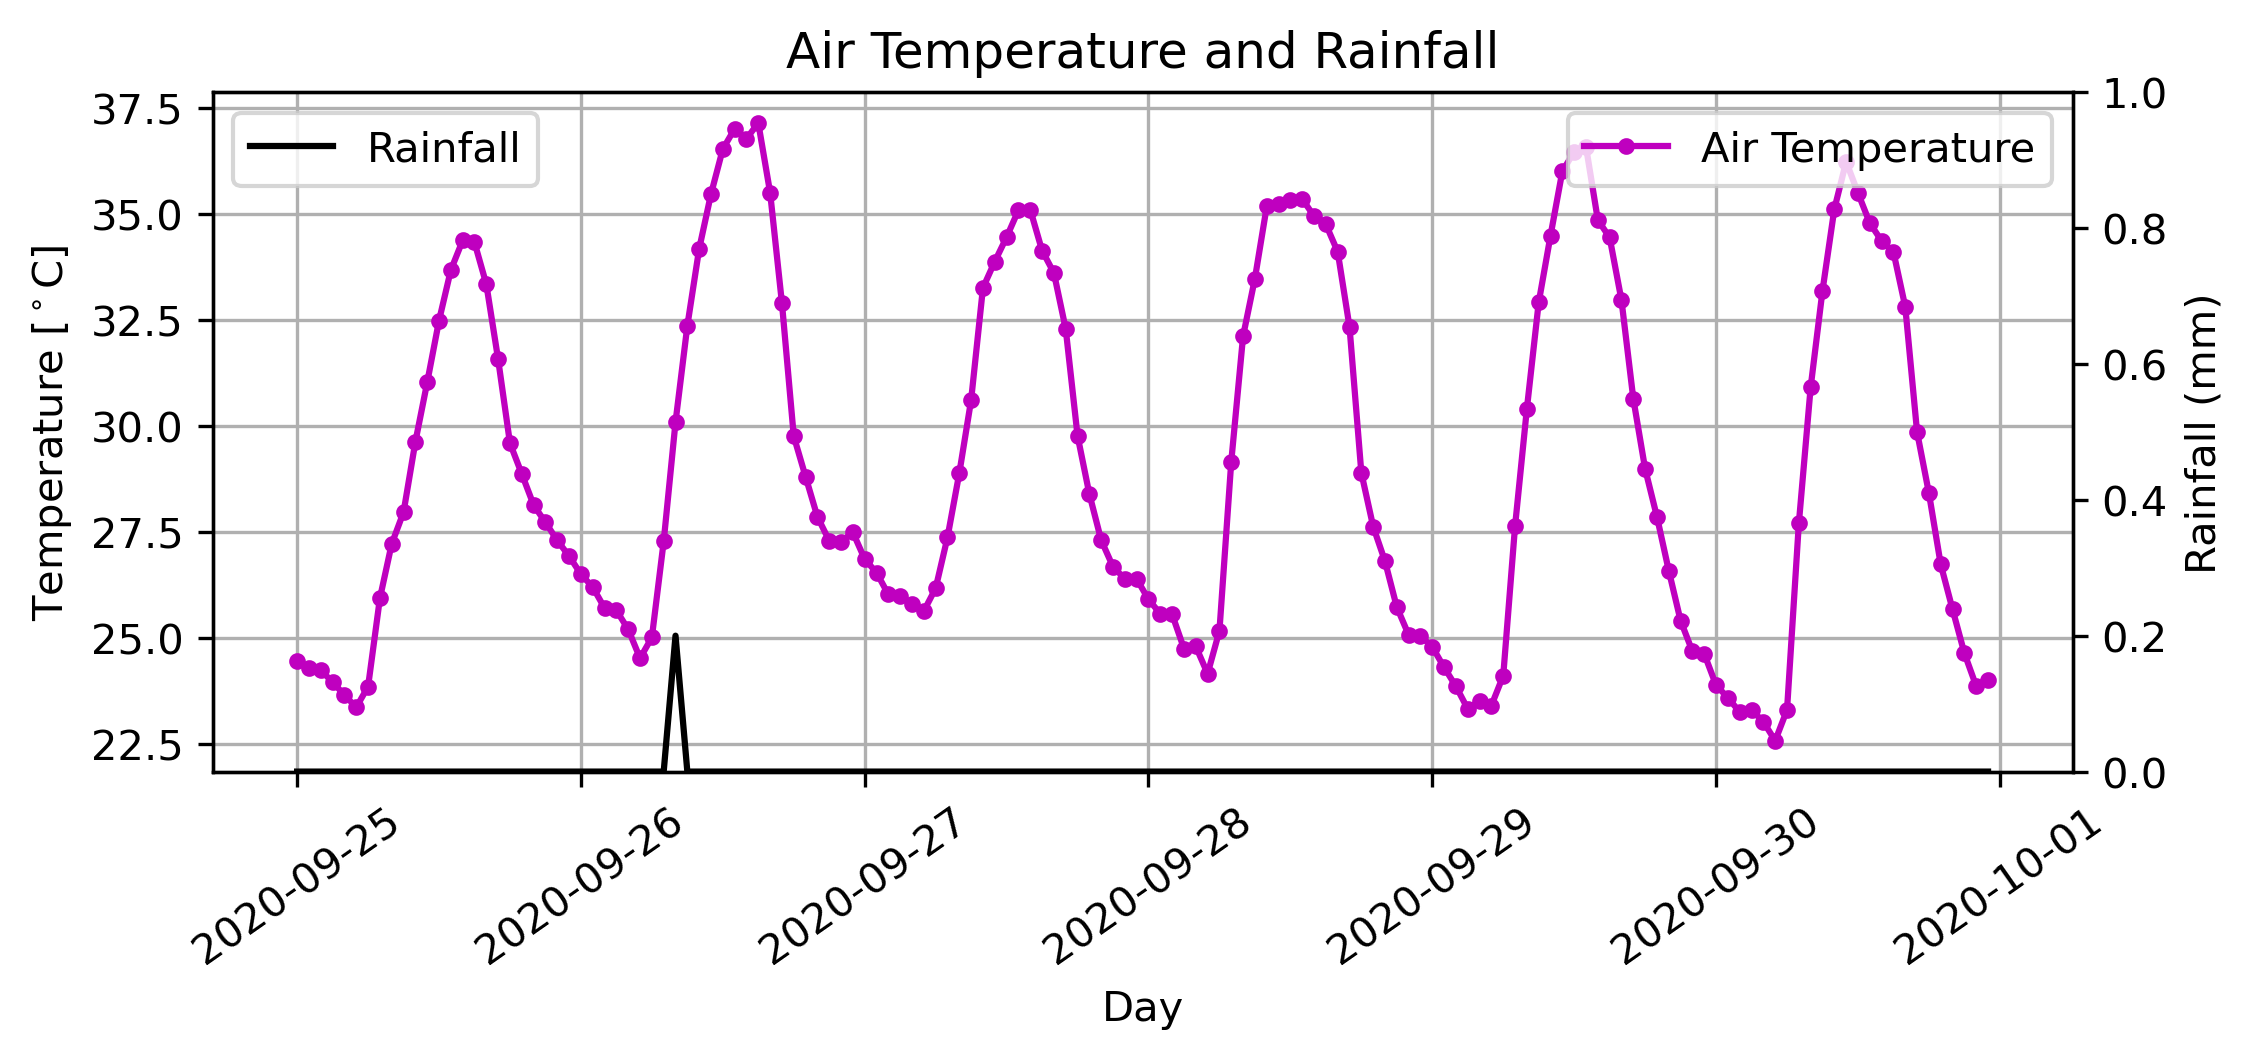

In [26]:
fig, dx = plt.subplots(1,1, figsize = (8, 3), dpi = 300)
dax = dx.twinx()
dx.plot(Air_Temp, 'm.-', label = 'Air Temperature')
dx.set_title('Air Temperature and Rainfall')
dax.plot(Rainfall.index, Rainfall.values, 'k', label = 'Rainfall')
dax.set_ylim((0, 1))
dx.grid()
dx.set_xlabel('Day')
dx.set_ylabel('Temperature [$^\circ$C]')
dax.set_ylabel('Rainfall (mm)')
dx.tick_params(axis = 'x',rotation=35)
dx.legend(loc=1)
dax.legend(loc=2);

In [27]:
NDVI = {'NDVI':[0.188, 0.161, 0.160, 0.163, 0.163, 0.178]}
NDVI

{'NDVI': [0.188, 0.161, 0.16, 0.163, 0.163, 0.178]}

In [28]:
SMS1, SMS5, SMS6, SMS7, SMS8, SMS9 = SM_sensor1.mean(), SM_sensor5.mean(), SM_sensor6.mean(), SM_sensor7.mean(), SM_sensor8.mean(),SM_sensor9.mean()
SMS1, SMS5, SMS6, SMS7, SMS8, SMS9

(7.786805555555558,
 6.283199074074075,
 5.371824074074074,
 11.942407407407401,
 8.701687499999998,
 6.13716435185185)

In [29]:
Mean_SM = {'SM_Mean':[SMS1, SMS5, SMS6, SMS7, SMS8, SMS9]}
Mean_SM
# post_mon = pd.DataFrame(Mean_SM, NDVI)
# post_mon

{'SM_Mean': [7.786805555555558,
  6.283199074074075,
  5.371824074074074,
  11.942407407407401,
  8.701687499999998,
  6.13716435185185]}

In [30]:
# data = pd.DataFrame(Mean_SM, NDVI)

In [31]:
# plt.scatter(NDVI, Mean_SM)
# sns.lmplot(x="NDVI", y="Mean_SM", data= post_mon);